## Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

##### Визуал контейнера ###
# from sklearn import set_config
# set_config(display="diagram")


import sklearn
#pip install --upgrade scikit-learn
sklearn.__version__


'1.1.2'

**Загрузим данные и сделаем задачу бинарной классификации**

In [2]:
# iris = load_iris()
# X = iris.data
# y = np.where(iris.target==1,1,0)


from sklearn.datasets import fetch_openml
X, y_cat = fetch_openml(data_id=1464, return_X_y=True)
y = [0 if i =='1' else 1 for i in y_cat]


Сплитуем данные и отложим тестовый набор. Так как данных мало стратифицируем.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                     test_size=0.5, stratify=y)

**Построим три конвеера для построени трех алгоритмов**

Сравним их между собой, целью визуализации метрик. 

In [41]:
pipe_1 = make_pipeline(Normalizer(),   KNeighborsClassifier(n_neighbors = 24, p=1))
pipe_2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 12, p=6, weights = 'distance'))
pipe_3 = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors= 1, p = 3, weights = 'distance'))

pipe_1.fit(X_train,y_train)
pipe_2.fit(X_train,y_train)
pipe_3.fit(X_train,y_train)

y_pred_1 = pipe_1.predict(X_test)
y_pred_2 = pipe_2.predict(X_test)
y_pred_3 = pipe_3.predict(X_test)

print("По умолчанию мерикa accuracy")
print("Тренировака: ", pipe_1.score(X_train,y_train), "   Тест : ", pipe_1.score(X_test,y_test))
print("Тренировака: ", pipe_2.score(X_train,y_train), "   Тест : ", pipe_2.score(X_test,y_test))
print("Тренировака: ", pipe_3.score(X_train,y_train), "   Тест : ", pipe_3.score(X_test,y_test))

По умолчанию мерикa accuracy
Тренировака:  0.7914438502673797    Тест :  0.7941176470588235
Тренировака:  0.9491978609625669    Тест :  0.7807486631016043
Тренировака:  0.9251336898395722    Тест :  0.6497326203208557


**Построим матрицы ошибок**

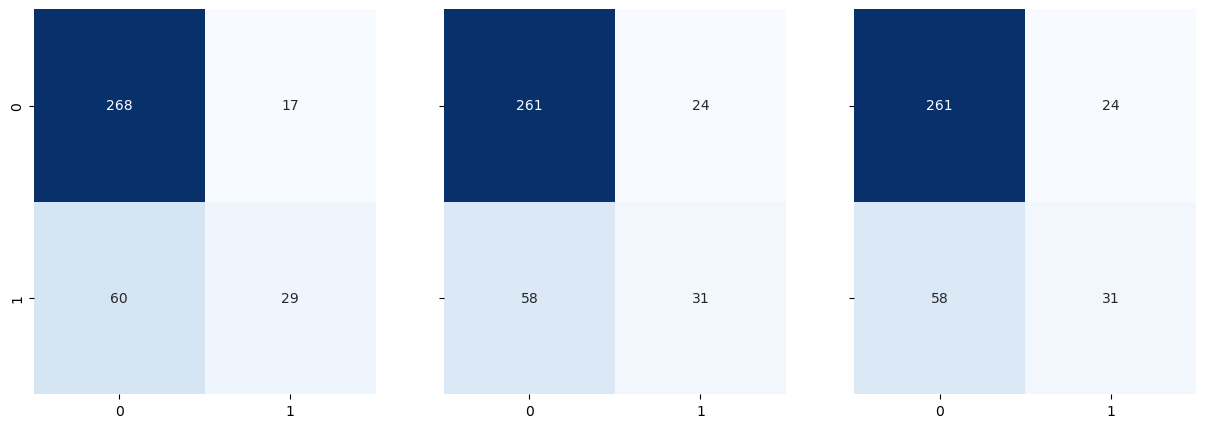

In [42]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_pred_1)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_3=confusion_matrix(y_test,y_pred_2)


fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");

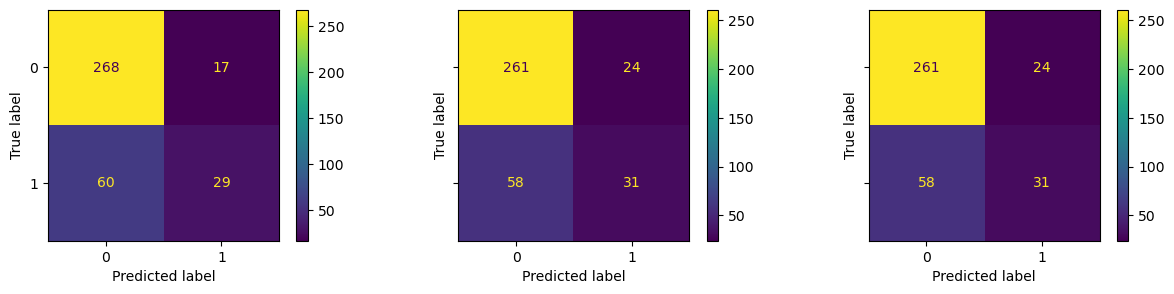

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);
ConfusionMatrixDisplay(matrix_3).plot(ax = ax3);

**отчет по классификации**

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_1))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       285
           1       0.63      0.33      0.43        89

    accuracy                           0.79       374
   macro avg       0.72      0.63      0.65       374
weighted avg       0.77      0.79      0.77       374

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       285
           1       0.56      0.35      0.43        89

    accuracy                           0.78       374
   macro avg       0.69      0.63      0.65       374
weighted avg       0.76      0.78      0.76       374

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       285
           1       0.31      0.38      0.34        89

    accuracy                           0.65       374
   macro avg       0.55      0.56      0.55       374
weighted avg       0.68      0.65      0.66       374



**отдельные метрики**

In [45]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('recall:    ', recall_score(y_test,  y_pred_3))
print('precision: ', precision_score(y_test,  y_pred_3))
print('f1:        ', f1_score(y_test,  y_pred_3))

recall:     0.38202247191011235
precision:  0.3090909090909091
f1:         0.3417085427135678


**построение ROC AUC**

Для построения ROC AUC из эстиматора или предсказания

**Важное замечание!!!**
Внимание `PrecisionRecallDisplay.from_predictions` **нельзя** брать результат команды predict
подробнее [тут](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py) только результат `decision_function`, если его нет, то команда не приненима!

In [46]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, pipe_3.predict_proba(X_test)[:,1]))

0.5576779026217229


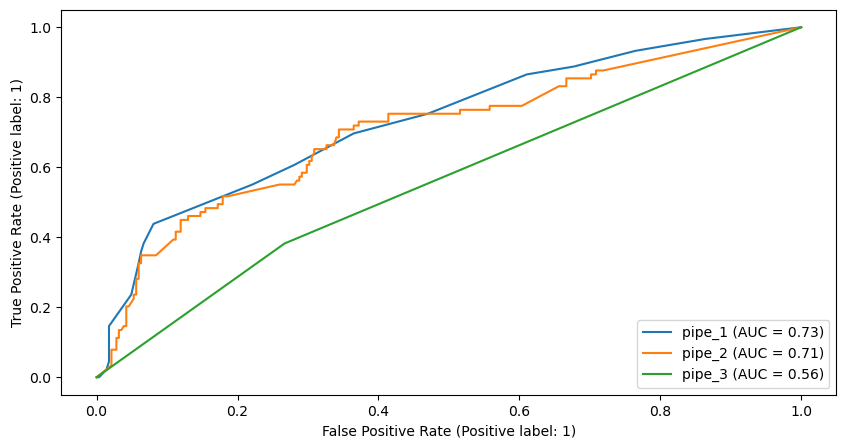

In [47]:
from sklearn.metrics import RocCurveDisplay

fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))

RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1');
RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_roc, name = 'pipe_2');
RocCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_roc, name = 'pipe_3');

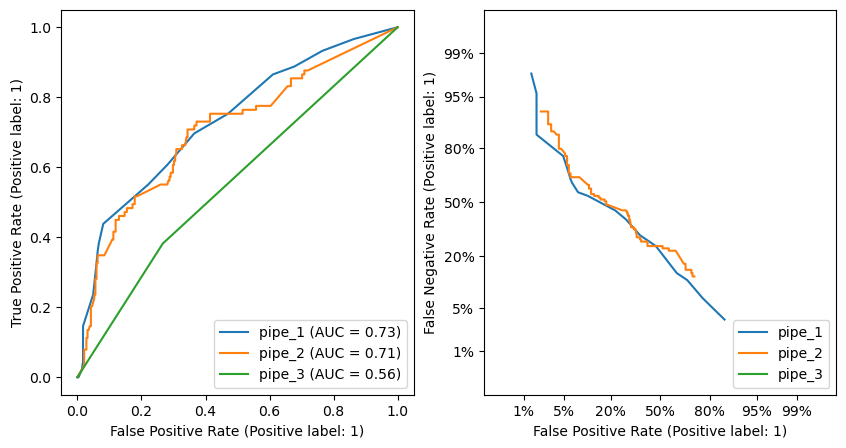

In [48]:
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1,2, figsize=(10, 5))

RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1');
RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_roc, name = 'pipe_2');
RocCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_roc, name = 'pipe_3');

DetCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_det, name = 'pipe_1');
DetCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_det, name = 'pipe_2');
DetCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_det, name = 'pipe_3');

**построение PR AUC**

Для построения PR AUC из эстиматора или предсказания

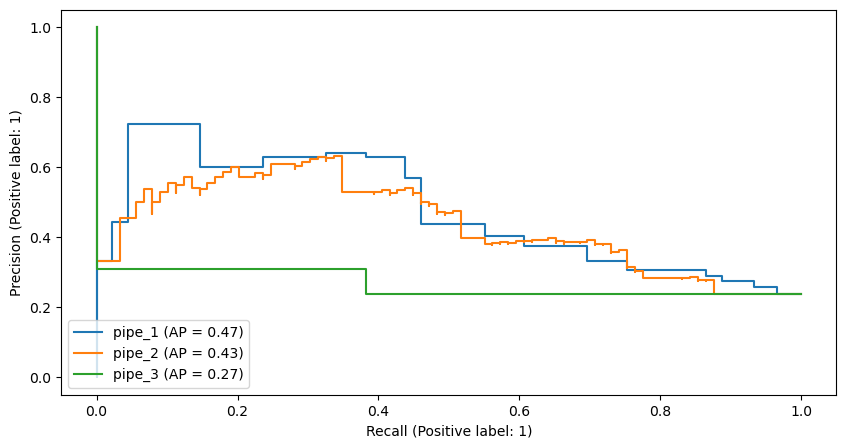

In [49]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax_pr = plt.subplots(1,1, figsize=(10, 5))

PrecisionRecallDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_pr, name = 'pipe_1');
PrecisionRecallDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_pr, name = 'pipe_2');
PrecisionRecallDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_pr, name = 'pipe_3');

**Заглянем под капот**

Полсмотрим на пороги (thresholds)

позиция порога 0.5 -  23
в позиции 21 для ROC
fpr:     0.063  tpr:        0.348  thresholds:,0.538
recall:  0.348  precision:, 0.633  thresholds:,0.538


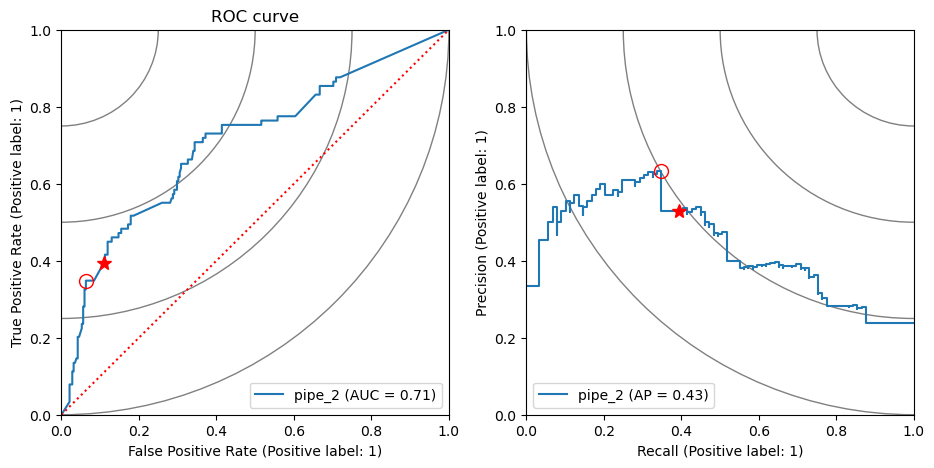

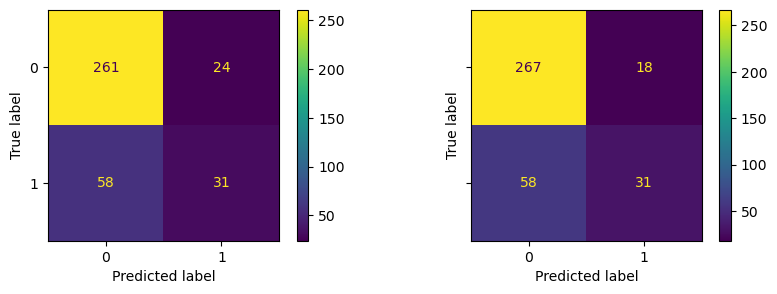

,precision,recall,f1-score,support
0,0.818182,0.915789,0.864238,285.000000
1,0.563636,0.348315,0.430556,89.000000
accuracy,0.780749,0.780749,0.780749,0.780749
macro avg,0.690909,0.632052,0.647397,374.000000
weighted avg,0.757608,0.780749,0.761036,374.000000
,precision,recall,f1-score,support
0,0.821538,0.936842,0.875410,285.000000
1,0.632653,0.348315,0.449275,89.000000
accuracy,0.796791,0.796791,0.796791,0.796791
macro avg,0.727096,0.642578,0.662343,374.000000


In [50]:
# фунция нахождения ближайшего индексаr в упорядоченном списке
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, pipe_2.predict_proba(X_test)[:,1], pos_label = None)


pos = 21 # зададим порог (2) (21, 61)
point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, name = 'pipe_2', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, pipe_2.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(pipe_2, X_test, y_test, name = 'pipe_2', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = np.where(thresholds_pr>=thresholds[pos])[0][0] # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


y_thresholds = np.where(pipe_2.predict_proba(X_test)[:,1]>=thresholds[pos], 1, 0)

matrix_thresholds = confusion_matrix(y_test, y_thresholds)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))

ConfusionMatrixDisplay(matrix_2).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_thresholds).plot(ax = ax2);
plt.show()


from IPython.display import display_html

df1 = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_thresholds, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('pipe_2')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('pipe_thresholds')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)